In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [139]:
df = pd.read_csv('Obesity prediction.csv')
df.head()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [140]:
df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [142]:
df.isnull().sum()


Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [143]:
df.duplicated().sum()


np.int64(24)

In [144]:
df.drop_duplicates(inplace=True)


In [145]:
kolom_non_numerik = [col for col in df.columns if df[col].dtype not in ['int64', 'float64']]
print("Kolom non-numerik:", kolom_non_numerik)

Kolom non-numerik: ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Obesity']


In [146]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[kolom_non_numerik] = df[kolom_non_numerik].apply(le.fit_transform)

df.head()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [154]:
df['TUE'].max()

np.float64(2.0)

In [133]:
df.corr()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
Gender,1.000000,0.050641,0.626748,0.163176,0.113492,0.061220,-0.271575,0.077863,0.074564,0.045501,0.095129,-0.102435,0.189471,0.022356,0.010574,-0.139044,0.014699
Age,0.050641,1.000000,-0.031748,0.198160,0.200379,0.063895,0.013572,-0.055823,0.092097,0.091261,-0.044058,-0.117959,-0.148202,-0.302927,-0.045565,-0.601476,0.238308
Height,0.626748,-0.031748,1.000000,0.457468,0.232258,0.180694,-0.040363,0.227806,0.058001,0.054326,0.220487,-0.137078,0.293584,0.041808,-0.135756,-0.068258,0.038700
Weight,0.163176,0.198160,0.457468,1.000000,0.492969,0.274655,0.216574,0.092149,0.300271,0.024369,0.203823,-0.205409,-0.056490,-0.079351,-0.211351,0.009836,0.388802
family_history,0.113492,0.200379,0.232258,0.492969,1.000000,0.214329,0.033199,0.028411,0.207738,0.014885,0.168627,-0.193947,-0.062937,0.002314,0.028403,-0.092730,0.330391
FAVC,0.061220,0.063895,0.180694,0.274655,0.214329,1.000000,-0.025419,-0.006398,0.147921,-0.050713,0.002993,-0.191277,-0.111184,0.071505,-0.087661,-0.069422,0.041023
FCVC,-0.271575,0.013572,-0.040363,0.216574,0.033199,-0.025419,1.000000,0.034885,-0.038565,0.013716,0.081332,0.071179,0.022003,-0.104128,-0.063132,0.069012,0.025728
NCP,0.077863,-0.055823,0.227806,0.092149,0.028411,-0.006398,0.034885,1.000000,-0.072316,0.005009,0.075335,-0.020461,0.127816,0.015693,-0.082985,-0.043648,-0.088235
CAEC,0.074564,0.092097,0.058001,0.300271,0.207738,0.147921,-0.038565,-0.072316,1.000000,-0.054960,0.114801,-0.109393,-0.034803,-0.036708,-0.039502,-0.058158,0.314510
SMOKE,0.045501,0.091261,0.054326,0.024369,0.014885,-0.050713,0.013716,0.005009,-0.054960,1.000000,-0.031642,0.047384,0.010811,0.016491,-0.083181,-0.009995,-0.023341


In [115]:
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns
kolom_numerik= kolom_numerik.drop('Obesity')
kolom_numerik


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

In [116]:
X = df.drop('Obesity', axis=1)
y = df['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [117]:
y_train

44      1
691     0
667     0
170     6
310     0
       ..
1662    3
1119    6
1154    6
1318    2
881     5
Name: Obesity, Length: 1669, dtype: int64

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        59
           1       0.84      0.61      0.70        61
           2       0.93      0.91      0.92        70
           3       0.97      1.00      0.98        64
           4       1.00      1.00      1.00        60
           5       0.73      0.75      0.74        55
           6       0.70      0.82      0.75        49

    accuracy                           0.86       418
   macro avg       0.86      0.86      0.85       418
weighted avg       0.87      0.86      0.86       418



In [121]:
print(accuracy_score(y_test, y_pred))

0.8636363636363636


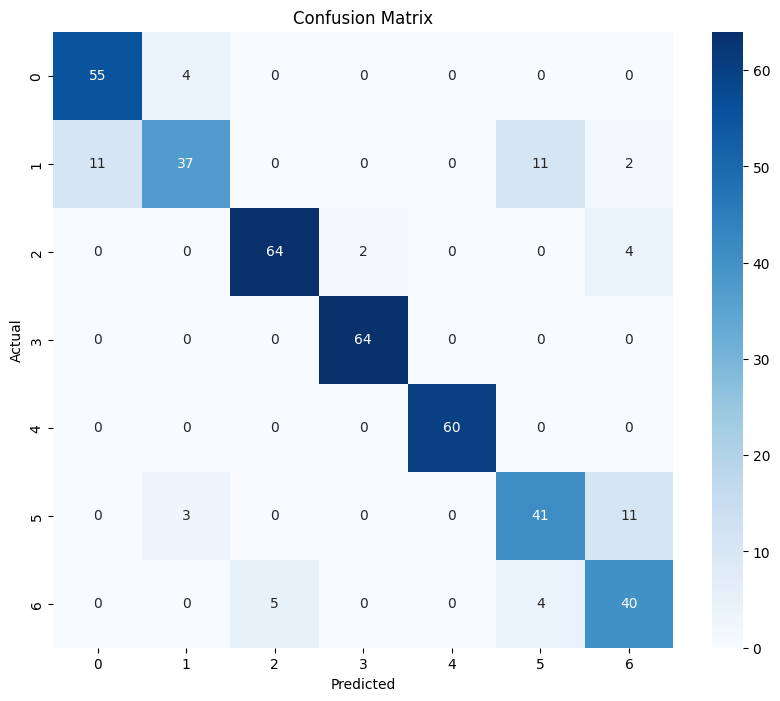

In [134]:
# Visualisasi confusion matrix dengan seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


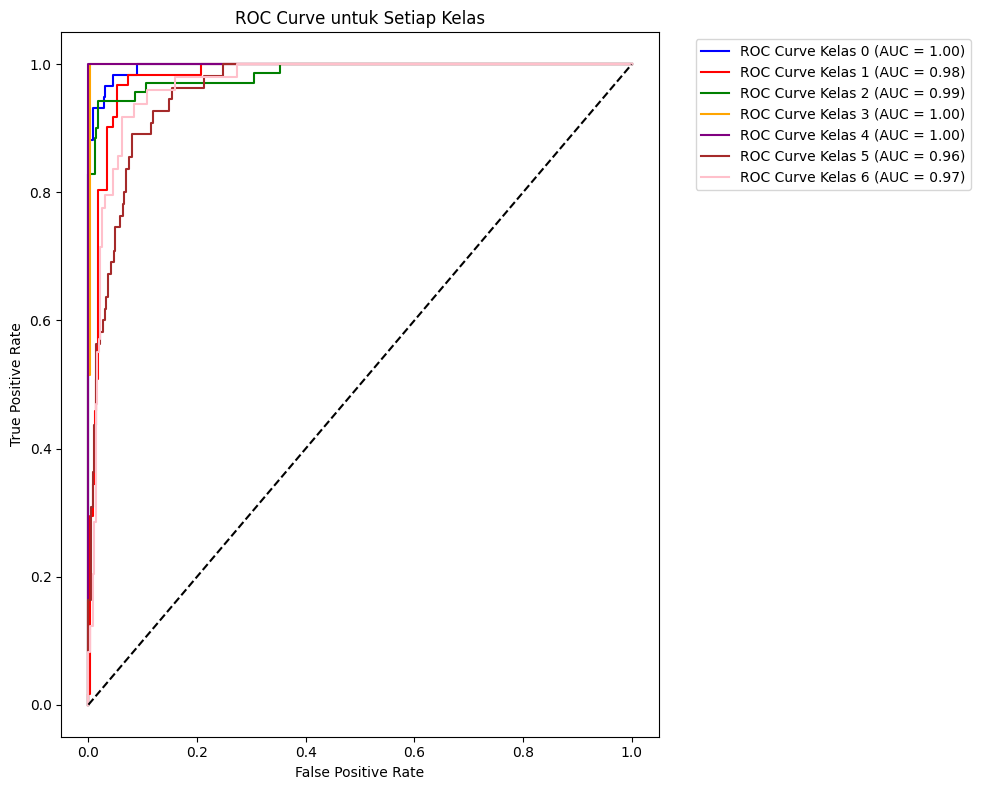


Rata-rata AUC: 0.985


In [136]:
# Membuat ROC Curve untuk kasus multi-class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Mengubah label menjadi format biner (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = model.predict_proba(X_test)

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']

for i in range(7):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], 
             label=f'ROC Curve Kelas {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Setiap Kelas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Menghitung dan menampilkan rata-rata AUC
macro_roc_auc = 0
for i in range(7):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    macro_roc_auc += auc(fpr, tpr)
macro_roc_auc /= 7

print(f'\nRata-rata AUC: {macro_roc_auc:.3f}')

In [137]:
# Simpan model dan transformers
import pickle

# Simpan model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Simpan scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
